In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

In [58]:
# ==========================
#   Chargement du dataset
# ==========================

In [59]:
# Charger le dataset
dataset = pd.read_csv("Advertising.csv")

# Sélection des features et de la cible
X = dataset[['TV', 'Radio', 'Newspaper']].values  # Matrice des variables explicatives
y = dataset['Sales'].values.reshape(-1, 1)  # Variable cible

In [60]:

########################### Degré du polynôm  #################################


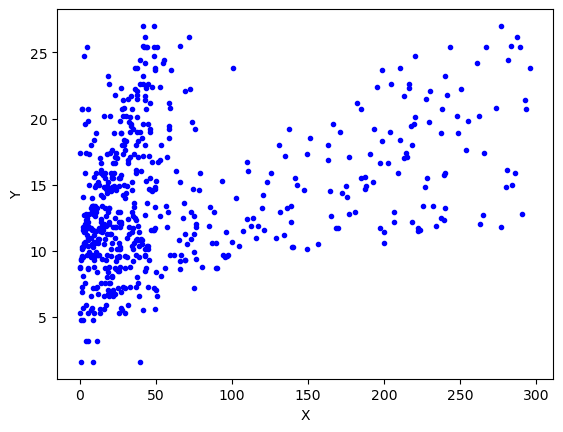

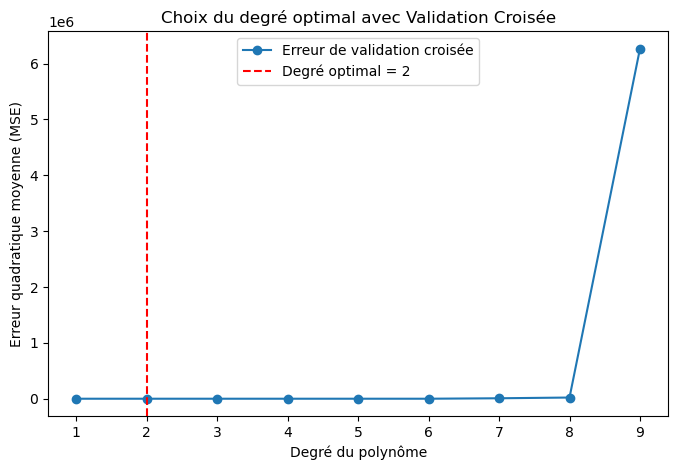

Degré optimal sélectionné : 2


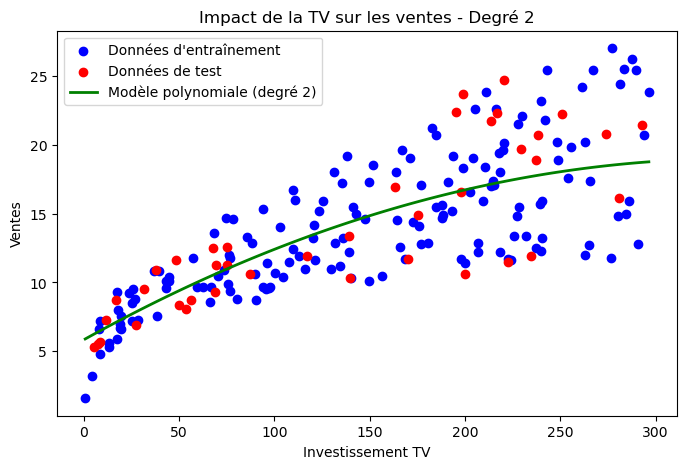

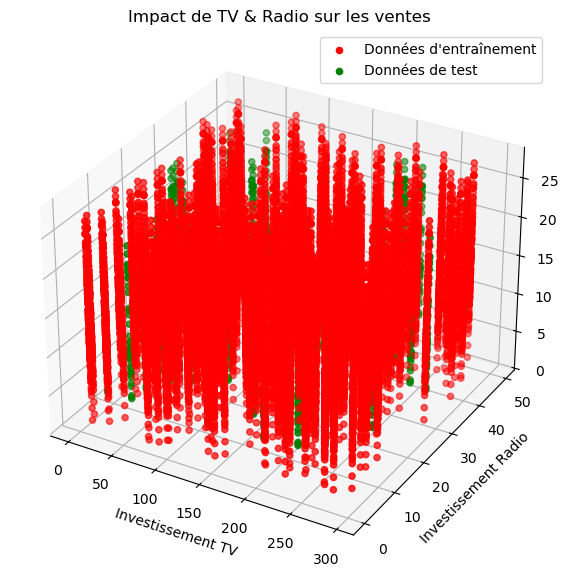

In [61]:
#visualize the data
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

X

# Séparation des données en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tester plusieurs degrés sur les données d'entraînement uniquement
degrees = range(1, 10)
cv_errors = []

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    
    model = LinearRegression()
    
    # Validation croisée sur l'ensemble d'entraînement
    scores = cross_val_score(model, X_train_poly, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_errors.append(-np.mean(scores))

# Trouver le degré optimal selon la validation croisée
optimal_degree = degrees[np.argmin(cv_errors)]

# Affichage des erreurs de validation croisée
plt.figure(figsize=(8, 5))
plt.plot(degrees, cv_errors, marker='o', label="Erreur de validation croisée")
plt.axvline(optimal_degree, color='red', linestyle='--', label=f"Degré optimal = {optimal_degree}")
plt.xlabel("Degré du polynôme")
plt.ylabel("Erreur quadratique moyenne (MSE)")
plt.title("Choix du degré optimal avec Validation Croisée")
plt.legend()
plt.show()

print(f"Degré optimal sélectionné : {optimal_degree}")

# Entraînement du modèle final avec le degré optimal
poly = PolynomialFeatures(degree=optimal_degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

X_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100).reshape(-1, 1)
X_other_features = np.full((100, 2), X[:, 1:].mean(axis=0))  # Remplissage avec moyennes
X_range_full = np.hstack([X_range, X_other_features])  # Reconstitution des trois features

X_range_poly = poly.transform(X_range_full)
y_pred = model.predict(X_range_poly)

plt.figure(figsize=(8, 5))
plt.scatter(X_train[:, 0], y_train, color='blue', label="Données d'entraînement")
plt.scatter(X_test[:, 0], y_test, color='red', label="Données de test")
plt.plot(X_range, y_pred, color='green', linewidth=2, label=f"Modèle polynomiale (degré {optimal_degree})")
plt.xlabel("Investissement TV")
plt.ylabel("Ventes")
plt.title(f"Impact de la TV sur les ventes - Degré {optimal_degree}")
plt.legend()
plt.show()


from mpl_toolkits.mplot3d import Axes3D

# Créer un espace 3D pour afficher TV, Radio et Newspaper contre les ventes
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train[:, 0], X_train[:, 1], y_train, color='red', label="Données d'entraînement")
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='green', label="Données de test")

ax.set_xlabel("Investissement TV")
ax.set_ylabel("Investissement Radio")
ax.set_zlabel("Ventes")
ax.set_title("Impact de TV & Radio sur les ventes")
plt.legend()
plt.show()




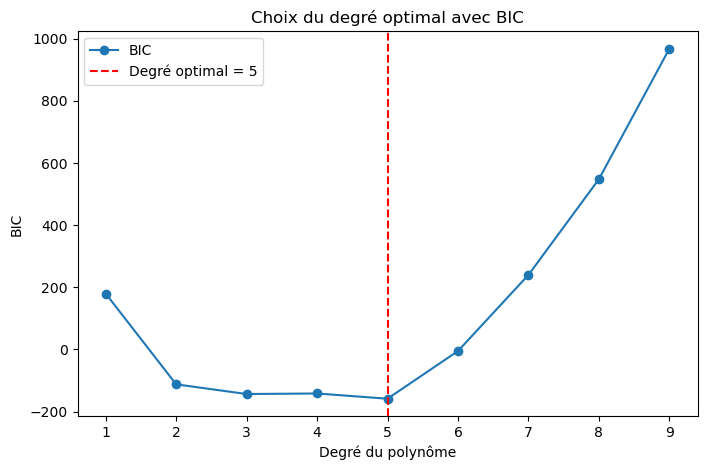

Degré optimal selon le BIC : 5
Erreur quadratique moyenne sur le test (MSE) : 76.5009627714763


In [62]:
# Tester plusieurs degrés sur l'ensemble d'entraînement uniquement
degrees = range(1, 10)
bic_values = []

n_train = len(y_train)  # Nombre d'observations dans l'ensemble d'entraînement

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Prédictions et erreur quadratique moyenne sur l'ensemble d'entraînement
    y_train_pred = model.predict(X_train_poly)
    mse = mean_squared_error(y_train, y_train_pred)

    # Calcul du BIC sur l'ensemble d'entraînement
    k = X_train_poly.shape[1]  # Nombre de paramètres (termes polynomiaux)
    bic = n_train * np.log(mse) + k * np.log(n_train)
    bic_values.append(bic)

# Trouver le degré optimal selon le BIC
optimal_degree_bic = degrees[np.argmin(bic_values)]

# Affichage des valeurs de BIC
plt.figure(figsize=(8, 5))
plt.plot(degrees, bic_values, marker='o', label="BIC")
plt.axvline(optimal_degree_bic, color='red', linestyle='--', label=f"Degré optimal = {optimal_degree_bic}")
plt.xlabel("Degré du polynôme")
plt.ylabel("BIC")
plt.title("Choix du degré optimal avec BIC")
plt.legend()
plt.show()
print(f"Degré optimal selon le BIC : {optimal_degree_bic}")

# Entraînement du modèle final avec le degré optimal sur l'ensemble d'entraînement
poly = PolynomialFeatures(degree=optimal_degree_bic)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

# Évaluation sur l'ensemble de test
y_test_pred = model.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Erreur quadratique moyenne sur le test (MSE) : {test_mse}")

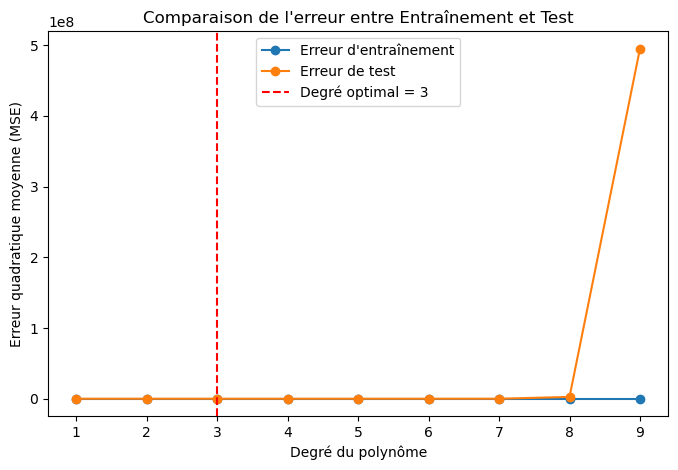

Degré optimal sélectionné selon l'erreur de test : 3


LinearRegression()

In [63]:
# Tester plusieurs degrés de polynôme
degrees = range(1, 10)
train_errors = []
test_errors = []

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Prédictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Calcul de l'erreur quadratique moyenne (MSE)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Trouver le degré optimal selon l'erreur de test minimale
optimal_degree_test = degrees[np.argmin(test_errors)]

# Affichage des erreurs en fonction du degré du polynôme
plt.figure(figsize=(8, 5))
plt.plot(degrees, train_errors, label="Erreur d'entraînement", marker='o')
plt.plot(degrees, test_errors, label="Erreur de test", marker='o')
plt.axvline(optimal_degree_test, color='red', linestyle='--', label=f"Degré optimal = {optimal_degree_test}")
plt.xlabel("Degré du polynôme")
plt.ylabel("Erreur quadratique moyenne (MSE)")
plt.title("Comparaison de l'erreur entre Entraînement et Test")
plt.legend()
plt.show()

print(f"Degré optimal sélectionné selon l'erreur de test : {optimal_degree_test}")

# Entraînement du modèle final avec le degré optimal
poly = PolynomialFeatures(degree=optimal_degree_test)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

In [64]:
# Verification des dimensions
print(X.shape)
print(y.shape)
X

(200, 3)
(200, 1)


array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [65]:

##################   Création de la matrice X #############################


In [66]:
# Ajout des termes polynomiaux
X = np.hstack((X, X[:, 0:1]**2, X[:, 1:2]**2, X[:, 2:3]**2 , X[:, 0:1]**3 , X[:, 1:2]**3 , X[:, 2:3]**3 ,X[:, 0:1]*X[:, 1:2] , X[:, 0:1]*X[:, 2:3] , X[:, 1:2]*X[:, 2:3] , X[:, 0:1]*X[:, 1:2]*X[:, 2:3] , (X[:, 1:2]**2)*X[:, 0:1] ,  (X[:, 0:1]**2)*X[:, 1:2] ,  (X[:, 0:1]**2)*X[:, 2:3] ,  (X[:, 2:3]**2)*X[:, 0:1] ,  (X[:, 1:2]**2)*X[:, 2:3] , (X[:, 2:3]**2)*X[:, 1:2]))

print(X.shape)
print(X[:10])

(200, 19)
[[2.30100000e+02 3.78000000e+01 6.92000000e+01 5.29460100e+04
  1.42884000e+03 4.78864000e+03 1.21828769e+07 5.40101520e+04
  3.31373888e+05 8.69778000e+03 1.59229200e+04 2.61576000e+03
  6.01886376e+05 3.28776084e+05 2.00135918e+06 3.66386389e+06
  1.10186606e+06 9.88757280e+04 1.81010592e+05]
 [4.45000000e+01 3.93000000e+01 4.51000000e+01 1.98025000e+03
  1.54449000e+03 2.03401000e+03 8.81211250e+04 6.06984570e+04
  9.17338510e+04 1.74885000e+03 2.00695000e+03 1.77243000e+03
  7.88731350e+04 6.87298050e+04 7.78238250e+04 8.93092750e+04
  9.05134450e+04 6.96564990e+04 7.99365930e+04]
 [1.72000000e+01 4.59000000e+01 6.93000000e+01 2.95840000e+02
  2.10681000e+03 4.80249000e+03 5.08844800e+03 9.67025790e+04
  3.32812557e+05 7.89480000e+02 1.19196000e+03 3.18087000e+03
  5.47109640e+04 3.62371320e+04 1.35790560e+04 2.05017120e+04
  8.26028280e+04 1.46001933e+05 2.20434291e+05]
 [1.51500000e+02 4.13000000e+01 5.85000000e+01 2.29522500e+04
  1.70569000e+03 3.42225000e+03 3.477265

In [67]:

##################   La normalization des donnes #############################


In [68]:
def z_score_normalization(data):
    """
    Normalise les caractéristiques d'un ensemble de données en utilisant la méthode Z-score.

    Args:
    - data : un tableau NumPy contenant les données à normaliser. Chaque colonne représente une caractéristique.

    Returns:
    - data_normalized : le tableau NumPy contenant les données normalisées.
    - mean : le tableau NumPy contenant les moyennes de chaque caractéristique avant normalisation.
    - std : le tableau NumPy contenant les déviations standard de chaque caractéristique avant normalisation.
    """
    # Calcul des moyennes et des déviations standard de chaque caractéristique
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)

    # Normalisation des données en utilisant la méthode Z-score
    data_normalized = (data - mean) / std

    return data_normalized, mean, std

In [69]:
# Séparer les données en ensemble d'entraînement et de test

x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)
print('x_train shape  : ', x_train.shape)
print('x_test shape  : ', x_test.shape)
print('y_train shape  : ', y_train.shape)
print('y_test shape  : ', y_test.shape)

x_train shape  :  (160, 19)
x_test shape  :  (40, 19)
y_train shape  :  (160, 1)
y_test shape  :  (40, 1)


In [70]:
# Normalization de x_train
x_train_norm, mean,std=z_score_normalization(x_train)
x_train_norm

array([[-0.40424839, -1.02823707, -0.33767538, ..., -0.40692249,
        -0.67967663, -0.56462234],
       [ 0.32060772, -0.91982774, -1.16143931, ..., -0.56389411,
        -0.70046839, -0.6245317 ],
       [-1.27051084,  0.2591237 ,  0.25425079, ..., -0.43219683,
        -0.07704647, -0.10201406],
       ...,
       [ 0.80424121,  0.71986334,  1.43317042, ...,  1.59200188,
         0.97240566,  1.24340387],
       [ 0.1851428 , -0.87239866, -0.60897488, ..., -0.43737679,
        -0.66972994, -0.58087296],
       [ 1.54692165, -0.86562307, -0.42153159, ..., -0.21613506,
        -0.65895234, -0.55632025]], shape=(160, 19))

In [71]:
##################   ajouter le biaiss #############################


X_train_norm_1 = np.hstack((x_train_norm, np.ones((x_train.shape[0], 1))))
X_train_norm_1

array([[-0.40424839, -1.02823707, -0.33767538, ..., -0.67967663,
        -0.56462234,  1.        ],
       [ 0.32060772, -0.91982774, -1.16143931, ..., -0.70046839,
        -0.6245317 ,  1.        ],
       [-1.27051084,  0.2591237 ,  0.25425079, ..., -0.07704647,
        -0.10201406,  1.        ],
       ...,
       [ 0.80424121,  0.71986334,  1.43317042, ...,  0.97240566,
         1.24340387,  1.        ],
       [ 0.1851428 , -0.87239866, -0.60897488, ..., -0.66972994,
        -0.58087296,  1.        ],
       [ 1.54692165, -0.86562307, -0.42153159, ..., -0.65895234,
        -0.55632025,  1.        ]], shape=(160, 20))

In [72]:
# Normalization de x_test
x_test_norm= (x_test - mean)/std
x_test_norm

array([[ 1.57812165e-01,  5.91127268e-01,  1.13227461e+00,
        -1.14868405e-01,  3.53971232e-01,  9.42058287e-01,
        -3.02770605e-01,  1.25682496e-01,  6.31098031e-01,
         5.01838751e-01,  8.80626951e-01,  9.76876694e-01,
         8.19003174e-01,  3.37003857e-01,  1.58990276e-01,
         4.01666337e-01,  7.27897556e-01,  6.31280854e-01,
         7.90472155e-01],
       [ 5.39252835e-01,  1.68199613e+00,  1.13227461e+00,
         3.37942156e-01,  2.10942255e+00,  9.42058287e-01,
         1.33921687e-01,  2.42027040e+00,  6.31098031e-01,
         1.75835198e+00,  1.24415002e+00,  1.93264278e+00,
         2.02122246e+00,  2.26811108e+00,  1.28257073e+00,
         8.87210178e-01,  9.85919462e-01,  2.35204878e+00,
         1.51452667e+00],
       [ 1.69783431e+00,  3.67533029e-01,  6.53800957e-01,
         2.21022509e+00,  8.21831001e-02,  3.52960294e-01,
         2.61797911e+00, -1.39297226e-01,  8.86241537e-02,
         1.44681051e+00,  1.74008652e+00,  4.72919345e-01,
    

In [73]:
##################   ajouter le biaiss #############################

X_test_norm_1 = np.hstack((x_test_norm, np.ones((x_test.shape[0], 1))))
X_test_norm_1

array([[ 1.57812165e-01,  5.91127268e-01,  1.13227461e+00,
        -1.14868405e-01,  3.53971232e-01,  9.42058287e-01,
        -3.02770605e-01,  1.25682496e-01,  6.31098031e-01,
         5.01838751e-01,  8.80626951e-01,  9.76876694e-01,
         8.19003174e-01,  3.37003857e-01,  1.58990276e-01,
         4.01666337e-01,  7.27897556e-01,  6.31280854e-01,
         7.90472155e-01,  1.00000000e+00],
       [ 5.39252835e-01,  1.68199613e+00,  1.13227461e+00,
         3.37942156e-01,  2.10942255e+00,  9.42058287e-01,
         1.33921687e-01,  2.42027040e+00,  6.31098031e-01,
         1.75835198e+00,  1.24415002e+00,  1.93264278e+00,
         2.02122246e+00,  2.26811108e+00,  1.28257073e+00,
         8.87210178e-01,  9.85919462e-01,  2.35204878e+00,
         1.51452667e+00,  1.00000000e+00],
       [ 1.69783431e+00,  3.67533029e-01,  6.53800957e-01,
         2.21022509e+00,  8.21831001e-02,  3.52960294e-01,
         2.61797911e+00, -1.39297226e-01,  8.86241537e-02,
         1.44681051e+00,  1.7

In [74]:
##########################  Entrainement    #############################

In [75]:

# Initialiser le vecteur theta aléatoirement
theta = np.random.randn(X_train_norm_1.shape[1], 1)
theta

array([[ 0.3517859 ],
       [-0.64313832],
       [-0.60653341],
       [ 0.82756147],
       [ 1.57767098],
       [ 0.00684311],
       [-0.6295932 ],
       [-0.76192665],
       [ 0.54783007],
       [ 0.0251541 ],
       [ 0.71314275],
       [-0.61351955],
       [ 1.44561196],
       [-0.43956147],
       [-0.58767273],
       [-1.8273239 ],
       [ 0.7905371 ],
       [-1.29810624],
       [-0.4316943 ],
       [ 0.04399809]])

In [76]:

# Initialiser le vecteur theta aléatoirement
theta_L1 = np.random.randn(X_train_norm_1.shape[1], 1)
theta_L1

array([[ 0.19111798],
       [-0.7019675 ],
       [ 0.73251653],
       [ 0.3581699 ],
       [ 0.7374593 ],
       [ 1.75866361],
       [-0.56316654],
       [-0.05724361],
       [ 0.12590736],
       [ 1.09805418],
       [-1.94513327],
       [ 0.73881273],
       [ 1.46217604],
       [ 0.52545328],
       [-0.90696926],
       [-0.05344108],
       [ 0.25647973],
       [-0.1480668 ],
       [ 0.35976236],
       [-0.99128532]])

In [77]:

# Initialiser le vecteur theta aléatoirement
theta_L2 = np.random.randn(X_train_norm_1.shape[1], 1)
theta_L2

array([[-0.16320524],
       [-0.26482596],
       [ 0.51610804],
       [-1.0507819 ],
       [ 1.24704457],
       [ 0.72627555],
       [ 0.22267483],
       [ 2.01109963],
       [ 0.01626835],
       [ 1.01281611],
       [ 2.27285776],
       [-0.68893654],
       [ 0.05841485],
       [ 1.91438725],
       [-1.02238918],
       [-0.80169756],
       [-0.22516152],
       [ 0.70948478],
       [ 0.09533715],
       [ 0.55961328]])

In [78]:
def model(X, theta):
    return X.dot(theta)

def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(n_iterations):
        theta -= learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

############################# ########################################
    

def cost_function_L1(X, y, theta,a):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2) + a/m * np.linalg.norm(theta, ord=1)

def grad_L1(X, y, theta,a):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y) + a/m * theta *np.sign(theta)

def gradient_descent_L1(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(n_iterations):
        theta -= learning_rate * grad_L1(X, y, theta,1)
        cost_history[i] = cost_function_L1(X, y, theta,1)
    return theta, cost_history



########################################################################################################


def cost_function_L2(X, y, theta,a):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2) + a/(2*m) * np.sum(theta[0:len(theta)-1]**2)


def grad_L2(X, y, theta,a):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y) + a/m * theta

def gradient_descent_L2(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(n_iterations):
        theta -= learning_rate * grad_L2(X, y, theta,1)
        cost_history[i] = cost_function_L2(X, y, theta,1)
    return theta, cost_history

In [79]:
######################################################################################################

In [80]:
cost_function(X_train_norm_1, y_train, theta)

np.float64(116.54759355681584)

In [81]:
cost_function_L1(X_train_norm_1, y_train, theta_L1,1)

np.float64(125.55025081444694)

In [82]:
cost_function_L2(X_train_norm_1, y_train, theta_L2,1)

np.float64(103.37913438481483)

In [83]:
# Paramètres de la descente de gradient
n_iterations = 100000
learning_rate = 0.0001

#entrainement:
theta_final, cost_history = gradient_descent(X_train_norm_1, y_train, theta, learning_rate, n_iterations)

theta_final


array([[ 2.12468289],
       [ 0.01551545],
       [ 0.02065938],
       [ 1.14141831],
       [ 1.7877785 ],
       [ 0.07995674],
       [-1.03145855],
       [-0.72779791],
       [ 0.17718456],
       [ 1.73253305],
       [ 0.98637006],
       [ 0.01991306],
       [ 1.56136155],
       [ 0.64921094],
       [ 0.22312752],
       [-2.2416524 ],
       [ 0.20750454],
       [-0.79805827],
       [-0.27166934],
       [14.09936218]])

In [84]:
#entrainement avec L1 :
theta_final_L1, cost_history_L1 = gradient_descent_L1(X_train_norm_1, y_train, theta_L1, learning_rate, n_iterations)

theta_final_L1


array([[ 2.42213662],
       [ 0.05711194],
       [ 0.26206484],
       [ 0.81679323],
       [ 0.79550354],
       [ 1.04714749],
       [-1.03820993],
       [-0.32940956],
       [-0.5562711 ],
       [ 2.53256093],
       [-1.36733163],
       [ 0.32597056],
       [ 1.32762145],
       [ 1.10004598],
       [-0.57275773],
       [-0.19340618],
       [ 0.2419659 ],
       [-0.80575702],
       [-0.39813184],
       [14.01178277]])

In [85]:
#entrainement avec L2 :
theta_final_L2, cost_history_L2 = gradient_descent_L2(X_train_norm_1, y_train, theta_L2, learning_rate, n_iterations)

theta_final_L2

array([[ 1.96669053e+00],
       [ 2.52820353e-01],
       [-2.31519000e-01],
       [-3.54444243e-01],
       [ 1.88769625e-01],
       [ 3.90883740e-01],
       [ 1.05283566e-01],
       [ 3.71935963e-02],
       [ 1.28258467e-01],
       [ 2.39972717e+00],
       [ 1.85055527e+00],
       [-6.95697692e-01],
       [ 4.88345803e-02],
       [ 1.64182240e+00],
       [-3.87281433e-01],
       [-1.50038201e+00],
       [-3.97650961e-01],
       [-6.96610734e-03],
       [ 1.23088749e-01],
       [ 1.40118489e+01]])

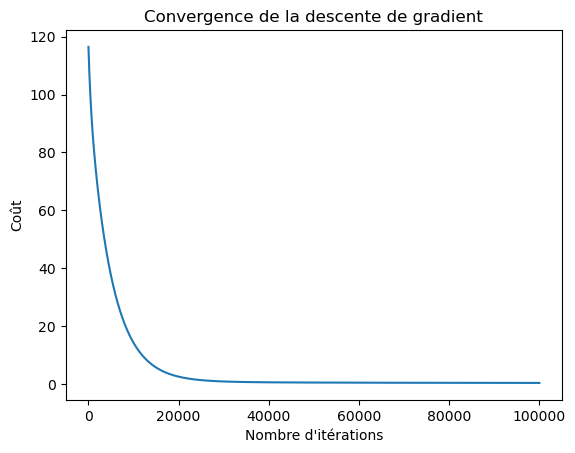

In [86]:
# Visualisation de la convergence de la fonction coût
plt.plot(range(n_iterations), cost_history)
plt.xlabel("Nombre d'itérations")
plt.ylabel("Coût")
plt.title("Convergence de la descente de gradient")
plt.show()

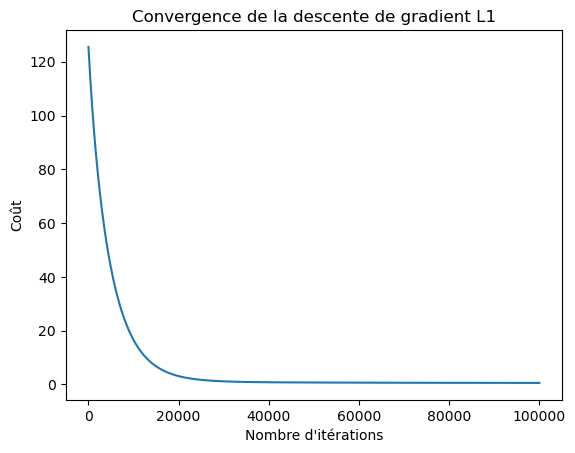

In [87]:
# Visualisation de la convergence de la fonction coût
plt.plot(range(n_iterations), cost_history_L1)
plt.xlabel("Nombre d'itérations")
plt.ylabel("Coût")
plt.title("Convergence de la descente de gradient L1")
plt.show()

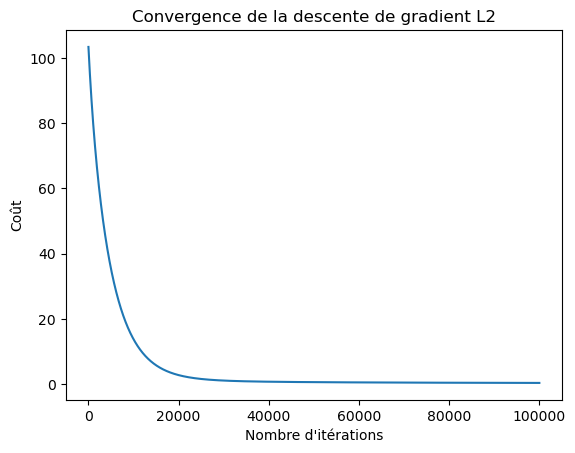

In [88]:
# Visualisation de la convergence de la fonction coût
plt.plot(range(n_iterations), cost_history_L2)
plt.xlabel("Nombre d'itérations")
plt.ylabel("Coût")
plt.title("Convergence de la descente de gradient L2")
plt.show()

In [89]:
# Prédictions et évaluation pour la méthode manuelle
def coef_determination(y, pred):
    u = ((y - pred) ** 2).sum()
    v = ((y - y.mean()) ** 2).sum()
    return 1 - u / v

r2_normal = coef_determination(y_test, model(X_test_norm_1, theta_final))
print(f'R² Score (Descente de gradient) NORMAL: {r2_normal}')

##################################################################
r2_Train = coef_determination(y_train, model(X_train_norm_1, theta_final))
print(f'R² Score (Descente de gradient) de dataset de Train NORMAL : {r2_Train}')

R² Score (Descente de gradient) NORMAL: 0.9730292076751654
R² Score (Descente de gradient) de dataset de Train NORMAL : 0.9736293820311942


In [90]:
# Prédictions et évaluation pour la méthode manuelle
def coef_determination(y, pred):
    u = ((y - pred) ** 2).sum()
    v = ((y - y.mean()) ** 2).sum()
    return 1 - u / v

r2_L1 = coef_determination(y_test, model(X_test_norm_1, theta_final_L1))
print(f'R² Score (Descente de gradient) de L1: {r2_L1}')

##################################################################
r2_L1_Train = coef_determination(y_train, model(X_train_norm_1, theta_final_L1))
print(f'R² Score (Descente de gradient) de L1 de dataset de Train : {r2_L1_Train}')

R² Score (Descente de gradient) de L1: 0.9757235007445696
R² Score (Descente de gradient) de L1 de dataset de Train : 0.9748392323714345


In [91]:
# Prédictions et évaluation pour la méthode manuelle
def coef_determination(y, pred):
    u = ((y - pred) ** 2).sum()
    v = ((y - y.mean()) ** 2).sum()
    return 1 - u / v

r2_L2 = coef_determination(y_test, model(X_test_norm_1, theta_final_L2))
print(f'R² Score (Descente de gradient) de L2 : {r2_L2}')

##################################################################
r2_L2_Train = coef_determination(y_train, model(X_train_norm_1, theta_final_L2))
print(f'R² Score (Descente de gradient) de L2 de dataset de Train : {r2_L2_Train}')

R² Score (Descente de gradient) de L2 : 0.9716094531418997
R² Score (Descente de gradient) de L2 de dataset de Train : 0.9718110771793759


Tester des prédictions

In [92]:
predictions_Normal = model(X_test_norm_1, theta_final)
predictions_Normal

array([[17.19955499],
       [22.89289044],
       [20.06635631],
       [ 8.09233338],
       [24.39859817],
       [12.53670701],
       [22.77831231],
       [ 8.37974556],
       [12.48456421],
       [15.1724439 ],
       [ 8.70195751],
       [ 8.34517053],
       [11.85223999],
       [ 7.93358937],
       [10.42521067],
       [12.05492313],
       [ 7.5080383 ],
       [16.0472237 ],
       [10.53502815],
       [18.72623324],
       [20.52814869],
       [13.49507747],
       [10.73800597],
       [22.44592699],
       [ 8.67481312],
       [ 7.92585459],
       [22.38968551],
       [12.00041545],
       [ 9.93049459],
       [ 7.93072969],
       [11.76183353],
       [10.06914003],
       [23.67047249],
       [ 7.60176088],
       [14.99550433],
       [20.83584913],
       [12.24742487],
       [19.9360625 ],
       [11.12978669],
       [ 7.09395096]])

In [93]:
predictions_Normal_Train = model(X_train_norm_1, theta_final)
predictions_Normal_Train

array([[10.40245244],
       [12.43053761],
       [ 9.56454417],
       [ 8.9383391 ],
       [12.26334689],
       [ 7.43204128],
       [ 9.99895059],
       [14.14744143],
       [10.01011624],
       [11.29144716],
       [14.05334392],
       [11.8104153 ],
       [ 6.73540353],
       [ 7.71176851],
       [ 8.47229852],
       [10.66869944],
       [ 9.76996812],
       [25.49954664],
       [ 7.77129498],
       [12.12121732],
       [15.47693536],
       [15.0758615 ],
       [11.92605707],
       [ 8.72805903],
       [13.87335985],
       [ 7.48902023],
       [21.04874582],
       [ 7.23739498],
       [10.50285418],
       [ 9.8873359 ],
       [ 9.8461403 ],
       [ 8.48571793],
       [14.56172029],
       [17.97845139],
       [16.84460612],
       [15.83164819],
       [14.94088229],
       [20.64789605],
       [12.00326118],
       [22.15800654],
       [ 7.99072726],
       [13.68317769],
       [10.0025696 ],
       [17.15652792],
       [ 9.10178472],
       [15

In [94]:
predictions_L1 = model(X_test_norm_1, theta_final_L1)
predictions_L1

array([[16.84794235],
       [22.75851438],
       [20.3412462 ],
       [ 8.32980513],
       [24.66318685],
       [12.46019506],
       [22.76806183],
       [ 8.41555203],
       [12.33810505],
       [14.98229649],
       [ 8.29393357],
       [ 8.46998988],
       [11.35638136],
       [ 7.24627507],
       [10.16750357],
       [11.80892577],
       [ 7.95868181],
       [15.95315912],
       [10.54077183],
       [18.57766704],
       [20.04310703],
       [10.77596653],
       [10.01698739],
       [22.25934787],
       [ 8.73275237],
       [ 7.94749049],
       [22.34644215],
       [11.99798738],
       [ 9.90268593],
       [ 7.2112094 ],
       [11.54910744],
       [ 9.9912848 ],
       [23.47538419],
       [ 7.80936683],
       [15.20868194],
       [20.74793957],
       [11.42302985],
       [20.20077133],
       [11.19492531],
       [ 7.23234978]])

In [95]:
predictions_L1_Train = model(X_train_norm_1, theta_final_L1)
predictions_L1_Train

array([[10.28121481],
       [12.4459616 ],
       [ 9.6485983 ],
       [ 8.94402828],
       [12.09782693],
       [ 7.45365197],
       [10.12418432],
       [14.03520511],
       [ 9.87952518],
       [11.10682865],
       [13.75548282],
       [11.71968712],
       [ 7.17961997],
       [ 8.07567769],
       [ 8.38125632],
       [10.46177301],
       [ 9.71946216],
       [25.89755386],
       [ 7.67454498],
       [12.07386792],
       [15.22450919],
       [14.9333122 ],
       [11.80648069],
       [ 9.27559889],
       [13.67995009],
       [ 7.61455425],
       [20.56921413],
       [ 7.45693658],
       [10.46245483],
       [ 9.03440485],
       [ 9.92647294],
       [ 8.4041016 ],
       [14.39962607],
       [17.76185465],
       [15.87397741],
       [15.75349518],
       [14.87038938],
       [20.85081672],
       [11.88658398],
       [22.06147094],
       [ 8.36024614],
       [13.57385595],
       [ 9.983125  ],
       [17.03879198],
       [ 9.12015365],
       [14

In [96]:
predictions_L2 = model(X_test_norm_1, theta_final_L2)
predictions_L2

array([[16.62586752],
       [23.01725675],
       [20.24818955],
       [ 7.5959177 ],
       [25.58296848],
       [12.18157981],
       [22.99606967],
       [ 8.56091339],
       [12.12734215],
       [14.7841219 ],
       [ 8.73538252],
       [ 8.59455755],
       [13.8374121 ],
       [ 7.48316001],
       [10.55047036],
       [12.14719108],
       [ 7.09702668],
       [15.6362596 ],
       [10.37206738],
       [18.36256004],
       [19.85222906],
       [14.59192572],
       [10.21705798],
       [21.89535533],
       [ 8.94245619],
       [ 8.21876538],
       [22.4318452 ],
       [11.80574089],
       [ 9.98135382],
       [ 7.74293385],
       [11.72026097],
       [10.00711658],
       [23.90562789],
       [ 9.04685442],
       [15.55523639],
       [20.76886091],
       [11.83583766],
       [19.83447713],
       [11.06501862],
       [ 7.4335461 ]])

In [97]:
predictions_L2_Train = model(X_train_norm_1, theta_final_L2)
predictions_L2_Train

array([[10.4405698 ],
       [11.98862302],
       [ 9.2458314 ],
       [ 9.07106989],
       [12.03424176],
       [ 7.76997175],
       [ 9.94323675],
       [13.83540823],
       [10.19205798],
       [11.10347794],
       [13.90303761],
       [11.5319237 ],
       [ 7.84615586],
       [ 7.31982045],
       [ 8.66585434],
       [10.7885854 ],
       [ 9.82559539],
       [25.81761302],
       [ 7.72080525],
       [11.51710979],
       [14.90487603],
       [14.69861554],
       [11.74545763],
       [ 8.70770298],
       [13.50532891],
       [ 7.53270722],
       [20.76249049],
       [ 7.39162295],
       [10.34427431],
       [ 9.28593937],
       [ 9.89769482],
       [ 8.61588809],
       [14.23621889],
       [17.51304655],
       [16.47073914],
       [15.36720334],
       [14.70429714],
       [21.18695754],
       [12.93699978],
       [22.15911058],
       [ 8.53882239],
       [13.46530237],
       [10.09679741],
       [16.79265125],
       [ 9.29142631],
       [15

In [98]:
print("La vente prédite du premier échantillon du dataset de test est : ", predictions_Normal[0])

La vente prédite du premier échantillon du dataset de test est :  [17.19955499]


In [99]:
print("La vente réelle du premier échantillon du dataset de test est : ",y_test[0])

La vente réelle du premier échantillon du dataset de test est :  [16.9]


In [100]:
print("La marge d'erreur commise est",predictions_Normal[0]-y_test[0])

La marge d'erreur commise est [0.29955499]


In [101]:
######################################################################################

In [102]:
print("La vente prédite (L1) du premier échantillon du dataset de test est : ", predictions_L1[0])

La vente prédite (L1) du premier échantillon du dataset de test est :  [16.84794235]


In [103]:
print("La vente réelle du premier échantillon du dataset de test est : ",y_test[0])

La vente réelle du premier échantillon du dataset de test est :  [16.9]


In [104]:
print("La marge d'erreur (L1) commise est",predictions_L1[0]-y_test[0])

La marge d'erreur (L1) commise est [-0.05205765]


In [105]:
######################################################################################

In [106]:
print("La vente prédite (L2) du premier échantillon du dataset de test est : ", predictions_L2[0])

La vente prédite (L2) du premier échantillon du dataset de test est :  [16.62586752]


In [107]:
print("La vente réelle du premier échantillon du dataset de test est : ",y_test[0])

La vente réelle du premier échantillon du dataset de test est :  [16.9]


In [108]:
print("La marge d'erreur (L2) commise est",predictions_L2[0]-y_test[0])

La marge d'erreur (L2) commise est [-0.27413248]


In [109]:
##########################################################################################

In [110]:
print("La vente prédite du premier échantillon du dataset de train est : ", predictions_Normal_Train[0])

La vente prédite du premier échantillon du dataset de train est :  [10.40245244]


In [111]:
a = y_test[0]
b = y_train[0]
# Création des données
data = {
    "Normal": [predictions_Normal[0] ,predictions_Normal_Train[0]],  # Valeurs fictives pour test et entraînement
    "Erreur Normal": [predictions_Normal[0]-a, predictions_Normal_Train[0]-b],
    "R² Normal": [r2_normal, r2_Train],
    "L1": [predictions_L1[0], predictions_L1_Train[0]],
    "Erreur L2": [predictions_L1[0]-a, predictions_L1_Train[0]-b],
    "R² L1": [r2_L1, r2_L1_Train],
    "L2": [predictions_L2[0], predictions_L2_Train[0]],
    "Erreur L2": [predictions_L2[0]-a, predictions_L2_Train[0]-b],
    "R² L2": [r2_L2, r2_L2_Train],
}

# Création du DataFrame
df = pd.DataFrame(data, index=["Test", "Entraînement"])

# Affichage du tableau
print(df)


                            Normal          Erreur Normal  R² Normal  \
Test           [17.19955499097651]   [0.2995549909765103]   0.973029   
Entraînement  [10.402452444549258]  [-0.5975475554507419]   0.973629   

                                L1               Erreur L2     R² L1  \
Test          [16.847942351456826]  [-0.27413248050649486]  0.975724   
Entraînement  [10.281214810672445]    [-0.559430195864751]  0.974839   

                                L2     R² L2  
Test          [16.625867519493504]  0.971609  
Entraînement  [10.440569804135249]  0.971811  


In [112]:
from IPython.display import display
display(df)

,Normal,Erreur Normal,R² Normal,L1,Erreur L2,R² L1,L2,R² L2
Test,[17.19955499097651],[0.2995549909765103],0.973029,[16.847942351456826],[-0.27413248050649486],0.975724,[16.625867519493504],0.971609
Entraînement,[10.402452444549258],[-0.5975475554507419],0.973629,[10.281214810672445],[-0.559430195864751],0.974839,[10.440569804135249],0.971811
